Optimized index centerdist: 157.4705469359265
Optimized gridding params: [113.6029227958414, 22.400127256820408, 0.004872390756896538, 0.004496605206422906, 47.306582688086976]
Optimizing cost:


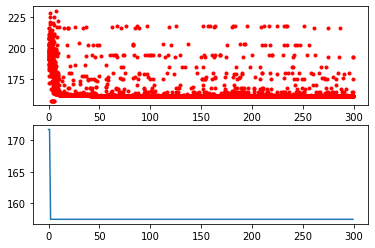

Result:


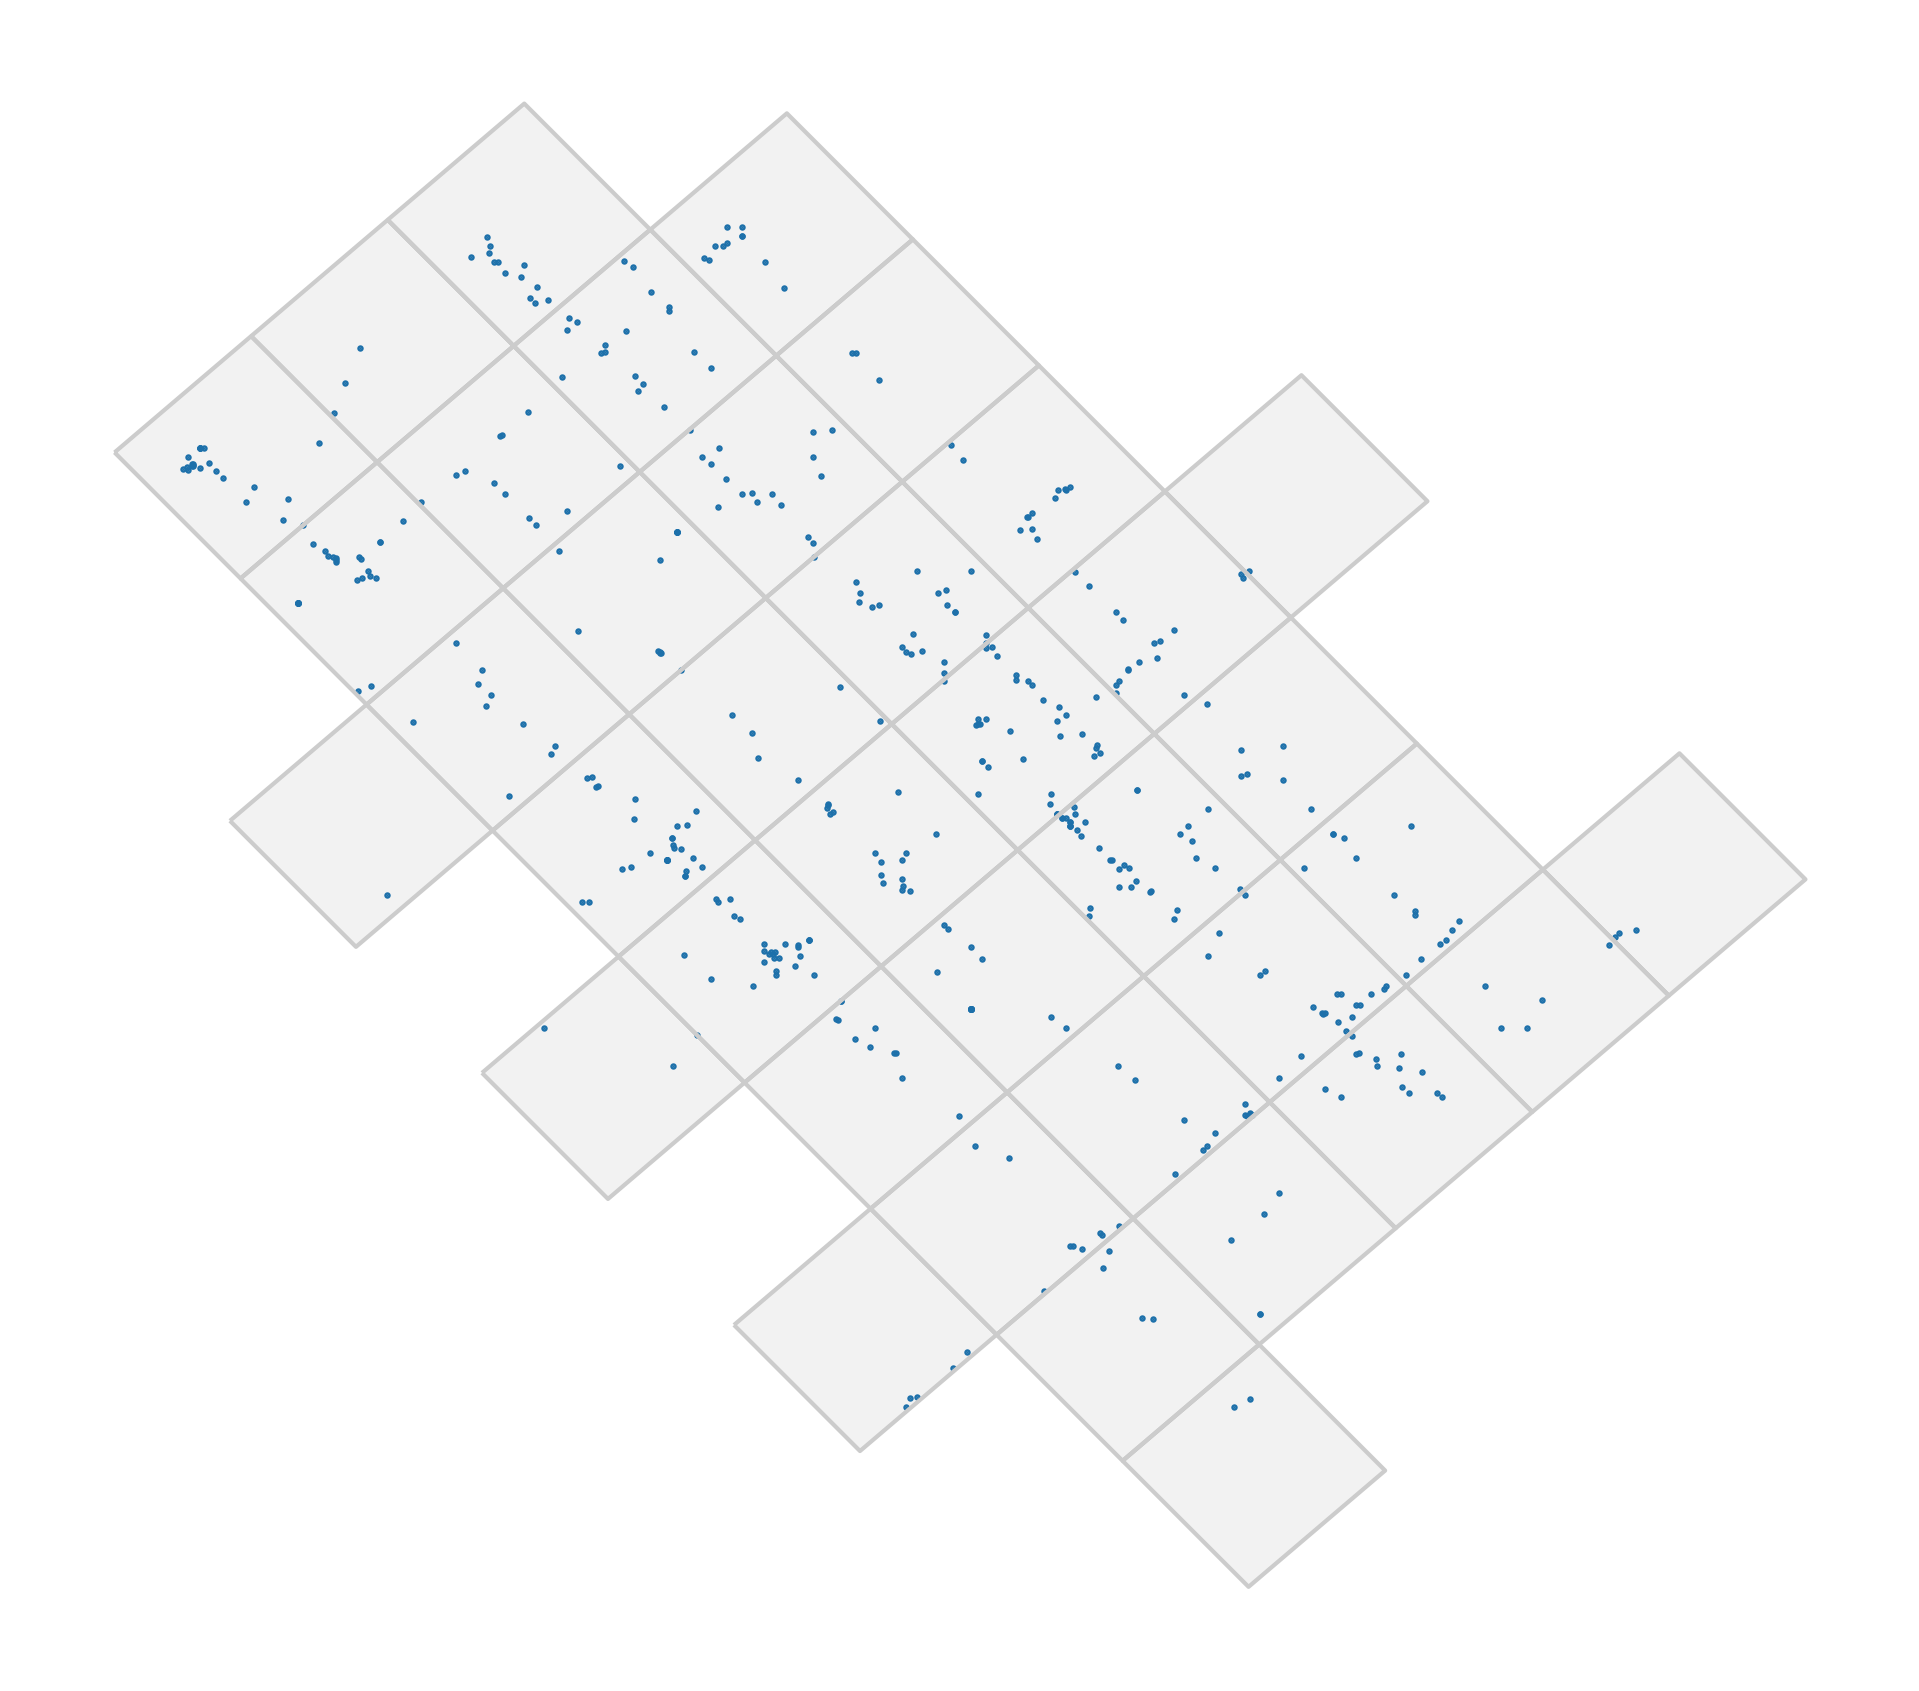

In [1]:
import pandas as pd
import geopandas as gpd
import transbigdata as tbd
#Read data
tripdata = pd.read_csv(r'data/TaxiData-Sample.csv')
tripdata.columns = ['track_id','time','lon','lat','OpenStatus','Speed']

#Retain the data in given area
area = gpd.read_file(r'data/gis/szarea1.json')
tripdata = tbd.clean_outofshape(tripdata,area,col=['lon','lat'])

#Generate initial griding params
bounds = [113.6,22.4,114.8,22.9]
initialparams = tbd.grid_params(bounds,accuracy = 500)

#Optimize griding params
params_optimized = tbd.grid_params_optimize(tripdata,
                                            initialparams,
                                            col=['track_id','lon','lat'],
                                            method='centerdist',
                                            sample=500,#sample=0 not sampling
                                            printlog=True)
